In [2]:
import os
import json
from PIL import Image

In [3]:
key2path = {}
# minsize_w = 100000
# minsize_h = 100000

# maxsize_w = 0
# maxsize_h = 0

for folder in sorted(os.listdir('images')):
    for filename in sorted(os.listdir(f'images/{folder}')):
        key = f'{folder}/{filename}'
        path = f'images/{key}'
        key2path[key] = path
        # w, h = Image.open(path).size
        # minsize_w = min(minsize_w, w)
        # minsize_h = min(minsize_h, h)
        # maxsize_w = max(maxsize_w, w)
        # maxsize_h = max(maxsize_h, h)
        print(path, end='\r')

In [18]:
minsize_w, minsize_h, maxsize_w, maxsize_h

(121, 120, 500, 500)

In [4]:
id2key = {}
key2id = {}

with open('images.txt') as f:
    for line in f:
        fn_id, key = line.strip().split(' ')
        id2key[fn_id] = key
        key2id[key] = fn_id

In [5]:
id2class = {}
key2class = {}

with open('image_class_labels.txt') as f:
    for line in f:
        fn_id, class_id = line.strip().split(' ')
        id2class[fn_id] = class_id
        key = id2key[fn_id]
        key2class[key] = class_id

In [6]:
id2split = {}

with open('train_test_split.txt') as f:
    for line in f:
        fn_id, split_id = line.strip().split(' ')
        id2split[fn_id] = int(split_id)

In [24]:
with open('../train.txt', 'w+') as f:
    maxclass_id = 0
    count = 0
    for key in key2path:
        class_id = int(key2class[key]) - 1
        maxclass_id = max(maxclass_id, class_id)
        path = key2path[key]
        fn_id = key2id[key]
        split_id = id2split[fn_id]
        if split_id == 1:
            f.write(f'data/cub200_2011/CUB_200_2011/{path} {class_id}\n')
            count += 1
    print(count)
        
with open('../database.txt', 'w+') as f:
    maxclass_id = 0
    count = 0
    for key in key2path:
        class_id = int(key2class[key]) - 1
        maxclass_id = max(maxclass_id, class_id)
        path = key2path[key]
        fn_id = key2id[key]
        split_id = id2split[fn_id]
        if split_id == 1:
            f.write(f'data/cub200_2011/CUB_200_2011/{path} {class_id}\n')
            count += 1
    print(count)
    
with open('../test.txt', 'w+') as f:
    maxclass_id = 0
    count = 0
    for key in key2path:
        class_id = int(key2class[key]) - 1
        maxclass_id = max(maxclass_id, class_id)
        path = key2path[key]
        fn_id = key2id[key]
        split_id = id2split[fn_id]
        if split_id == 0:
            f.write(f'data/cub200_2011/CUB_200_2011/{path} {class_id}\n')
            count += 1
    print(count)

5994
5994
5794


In [25]:
maxclass_id

199

In [48]:
len(att_labels), len(key2path), len(count) # , att_labels

(11788, 11788, 11788)

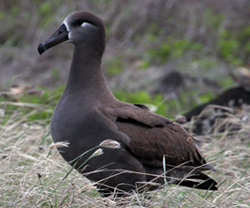

In [49]:
Image.open(key2path[id2key['10']])

In [11]:
import numpy as np
from collections import defaultdict

image_attribute_labels = open('attributes/image_attribute_labels.txt').readlines()
att_labels = defaultdict(list)
att_onehot = np.zeros((len(id2class), 312))
maxlen = 0
count = set()

for line in image_attribute_labels:
    line = line.strip()
    atts = line.split(' ')[:4]
    atts = list(map(int, atts))
    if atts[2] == 1:  # is present and confident
        imgid = atts[0]
        count.add(imgid)
        attid = atts[1] - 1
        att_labels[imgid].append(str(attid))
        att_onehot[int(imgid) - 1, attid] = 1
        maxlen = max(maxlen, len(att_labels[imgid]))
        
print(len(count), len(att_labels))
att_labels = {str(k): v for k, v in att_labels.items()}
print(len(att_labels))
# image_attribute_labels = np.array(image_attribute_labels)

11788 11788
11788


In [8]:
# for k in att_labels:
#     att_labels[k].append(312 + (int(id2class[k]) - 1))

In [224]:
att_onehot.sum(axis=1).mean()

31.47667119104174

(203,)


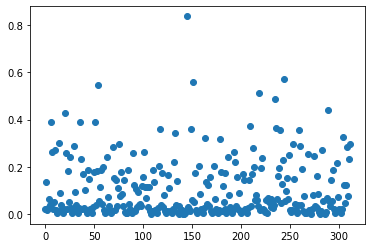

In [211]:
keeps = np.arange(312)[att_onehot.mean(axis=0) < 0.1]
print(keeps.shape)
plt.scatter(np.arange(312), att_onehot.mean(axis=0))

In [102]:
attid2name = open('attributes/attributes.txt').readlines()
attid2name = [line.strip().split(' ') for line in attid2name]
attid2name = {int(k) - 1: v for k, v in attid2name}

In [106]:
attcoarse2fg = defaultdict(list)
for attid, name in attid2name.items():
    coarse, fg = name.split('::')
    attcoarse2fg[coarse].append((fg, attid))

In [246]:
import shutil

with open('../../cub200_2011_att/train.txt', 'w+') as f:
    count = 0
    for key in key2path:
        class_id = int(key2class[key]) - 1
        path = key2path[key]
        fn_id = key2id[key]
        split_id = id2split[fn_id]
        if fn_id not in att_labels:
            att_labels[fn_id] = ['-1']
        if split_id == 1:
            f.write(f'data/cub200_2011/CUB_200_2011/{path} {class_id} {",".join(att_labels[fn_id])}\n')
            count += 1
    print(count)

shutil.copy('../../cub200_2011_att/train.txt', '../../cub200_2011_att/database.txt')
    
with open('../../cub200_2011_att/test.txt', 'w+') as f:
    count = 0
    for key in key2path:
        class_id = int(key2class[key]) - 1
        path = key2path[key]
        fn_id = key2id[key]
        split_id = id2split[fn_id]
        if fn_id not in att_labels:
            att_labels[fn_id] = ['-1']
        if split_id == 0:
            f.write(f'data/cub200_2011/CUB_200_2011/{path} {class_id} {",".join(att_labels[fn_id])}\n')
            count += 1
    print(count)
    
with open('../../cub200_2011_cropped_dino_att/train.txt', 'w+') as f:
    count = 0
    for key in key2path:
        class_id = int(key2class[key]) - 1
        path = key2path[key]
        fn_id = key2id[key]
        split_id = id2split[fn_id]
        if fn_id not in att_labels:
            att_labels[fn_id] = ['-1']
        if split_id == 1:
            f.write(f'data/cub200_2011_cropped_dino/{path} {class_id} {",".join(att_labels[fn_id])}\n')
            count += 1
    print(count)
    
shutil.copy('../../cub200_2011_cropped_dino_att/train.txt', '../../cub200_2011_cropped_dino_att/database.txt')
    
with open('../../cub200_2011_cropped_dino_att/test.txt', 'w+') as f:
    count = 0
    for key in key2path:
        class_id = int(key2class[key]) - 1
        path = key2path[key]
        fn_id = key2id[key]
        split_id = id2split[fn_id]
        if fn_id not in att_labels:
            att_labels[fn_id] = ['-1']
        if split_id == 0:
            f.write(f'data/cub200_2011_cropped_dino/{path} {class_id} {",".join(att_labels[fn_id])}\n')
            count += 1
    print(count)

TypeError: sequence item 27: expected str instance, int found

In [13]:
c = defaultdict(lambda: defaultdict(int))
ctotal = defaultdict(int)
ltotal = defaultdict(int)
minlabel = 9999999

for imgid, imgcls in id2class.items():
    if imgid in att_labels:
        minlabel = min(minlabel, len(att_labels[imgid]))
        for l in att_labels[imgid]:
            c[imgcls][l] += 1
            ctotal[imgcls] += 1
            ltotal[l] += 1
            
print(minlabel)

3


In [118]:
ltotal['4'], sum([c[imgcls]['4'] for imgcls in c])

(461, 461)

In [14]:
mat = np.zeros((200, 312))
for imgcls in c.keys():
    z = np.zeros(312)
    for l in c[imgcls].keys():
        p = c[imgcls][l]
        # z[int(l)] = p / ltotal[l]
        # z[int(l)] = p / ctotal[imgcls]
        z[int(l)] = p # / len(id2class)
    mat[int(imgcls) - 1] = z

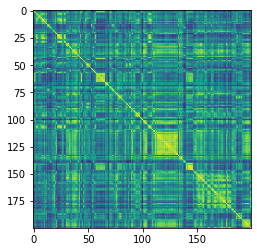

In [16]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

matnorm = F.normalize(torch.from_numpy(mat).float(), p=2, dim=1) 
matsim = matnorm @ matnorm.t()
plt.imshow(matsim.numpy())

tensor(0.9049)


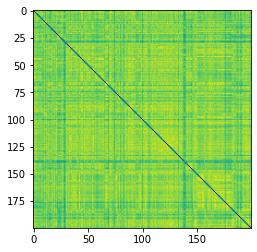

In [243]:
# ones_like = torch.ones_like(matsim).bool()
print(matsim.max())
eye = torch.eye(matsim.size(0))
matsim = matsim * (1 - eye)
# matsim = matsim * (matsim > 0.9)

plt.imshow(matsim)
# plt.hist(matsim[torch.triu(ones_like, 1)].numpy(), bins=100)

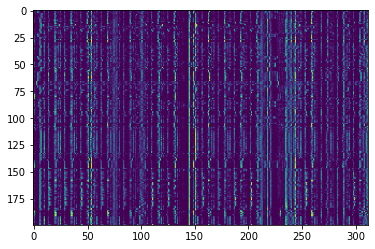

In [17]:
import matplotlib.pyplot as plt

plt.imshow(mat)

In [143]:
mat[5, 135:149]

array([ 0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1., 10., 28.,  0.,
        0.])

In [142]:
for imgid, atts in att_labels.items():
    cls_idx = int(id2class[str(imgid)]) - 1
    atts = list(map(int, atts))
    for j in range(135, 149):
        if j in atts and cls_idx == 4:
            print(imgid, attid2name[j], id2key[imgid])

239 has_eye_color::black 005.Crested_Auklet/Crested_Auklet_0006_1813.jpg
239 has_eye_color::white 005.Crested_Auklet/Crested_Auklet_0006_1813.jpg
240 has_eye_color::white 005.Crested_Auklet/Crested_Auklet_0042_794902.jpg
243 has_eye_color::white 005.Crested_Auklet/Crested_Auklet_0010_794907.jpg
244 has_eye_color::grey 005.Crested_Auklet/Crested_Auklet_0041_794910.jpg
245 has_eye_color::white 005.Crested_Auklet/Crested_Auklet_0029_1824.jpg
246 has_eye_color::black 005.Crested_Auklet/Crested_Auklet_0044_1825.jpg
246 has_eye_color::white 005.Crested_Auklet/Crested_Auklet_0044_1825.jpg
247 has_eye_color::white 005.Crested_Auklet/Crested_Auklet_0013_794914.jpg
248 has_eye_color::blue 005.Crested_Auklet/Crested_Auklet_0047_794918.jpg
248 has_eye_color::white 005.Crested_Auklet/Crested_Auklet_0047_794918.jpg
249 has_eye_color::black 005.Crested_Auklet/Crested_Auklet_0005_794922.jpg
250 has_eye_color::white 005.Crested_Auklet/Crested_Auklet_0019_794925.jpg
251 has_eye_color::black 005.Crested_

(<matplotlib.collections.PathCollection at 0x7f435e7c6cd0>, 145)

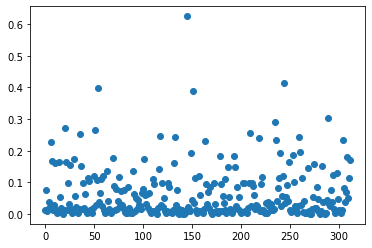

In [157]:
plt.scatter(np.arange(312), np.sum(mat, axis=0)), np.sum(mat, axis=0).argmax()

In [107]:
attcoarse2fg['has_eye_color']

[('blue', 135),
 ('brown', 136),
 ('purple', 137),
 ('rufous', 138),
 ('grey', 139),
 ('yellow', 140),
 ('olive', 141),
 ('green', 142),
 ('pink', 143),
 ('orange', 144),
 ('black', 145),
 ('white', 146),
 ('red', 147),
 ('buff', 148)]

In [6]:
class_names = open('classes.txt').readlines()
class_names = [name.strip().split(' ')[1].split('.')[1] for name in class_names]
class_names = [' '.join(name.split('_')).lower() for name in class_names]
with open('../class_names.txt', 'w+') as f:
    for line in class_names:
        f.write(line + '\n')